# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import os
import pandas as pd
import numpy as np

## Labelled Cough audio dataset

In [2]:
metadata = pd.read_csv('clinical\\labels.csv')
metadata.head(10)

,date,corona_test,age,gender,medical_history,folder,smoker,patient_reported_symptoms,cough_filename
0,21-Apr,negative,53,male,"none,",neg,yes,"none,",neg-0421-083-cough-m-53.mp3
1,21-Apr,positive,50,male,"Congestive heart failure,",pos,no,"Shortness of breath,",pos-0421-084-cough-m-50.mp3
2,21-Apr,negative,43,male,"none,",neg,no,"Sore throat,",neg-0421-085-cough-m-43.mp3
3,21-Apr,positive,65,male,"Asthma or chronic lung disease,",pos,no,"Shortness of breath,New or worsening cough,",pos-0421-086-cough-m-65.mp3
4,21-Apr,positive,40,female,"none,",pos,no,"Sore throat,Loss of taste,Loss of smell,",pos-0421-087-cough-f-40.mp3
5,21-Apr,negative,66,female,"Diabetes with complications,",neg,no,"none,",neg-0421-088-cough-f-66.mp3
6,21-Apr,negative,20,female,"none,",neg,no,"none,",neg-0421-089-cough-f-20.mp3
7,21-Apr,negative,17,female,"none,",neg,no,"Shortness of breath,Sore throat,Body aches,",neg-0421-090-cough-f-17.mp3
8,21-Apr,negative,47,male,"none,",neg,no,"New or worsening cough,",neg-0421-091-cough-m-47.mp3
9,21-Apr,positive,53,male,"none,",pos,no,"Fever, chills, or sweating,Shortness of breath...",pos-0421-092-cough-m-53.mp3


## COVID Positive cough audio waveplot

C:\Users\ADMIN\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


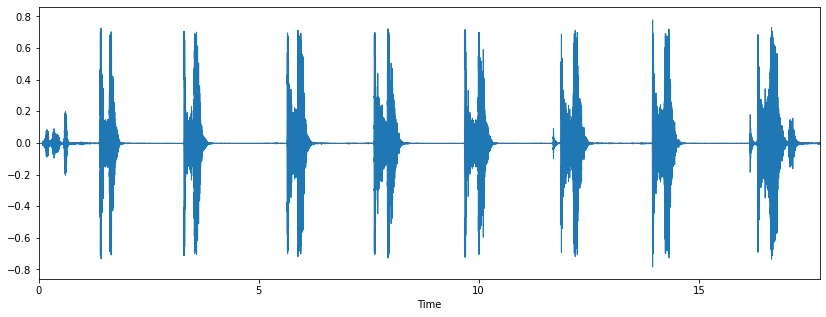

In [3]:
filename_pos="clinical\original\pos\\pos-0421-084-cough-m-50.mp3"
plt.figure(figsize=(14,5))
data_pos,sample_rate_pos=librosa.load(filename_pos)
librosa.display.waveplot(data_pos,sr=sample_rate_pos)
ipd.Audio(filename_pos)

#### Normalized Sample Rate

In [4]:
sample_rate_pos

22050

#### Audio data converted to array

In [5]:
data_pos

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -1.9726438e-04,  1.1065308e-05,  0.0000000e+00], dtype=float32)

## COVID Negative cough audio waveplot

C:\Users\ADMIN\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


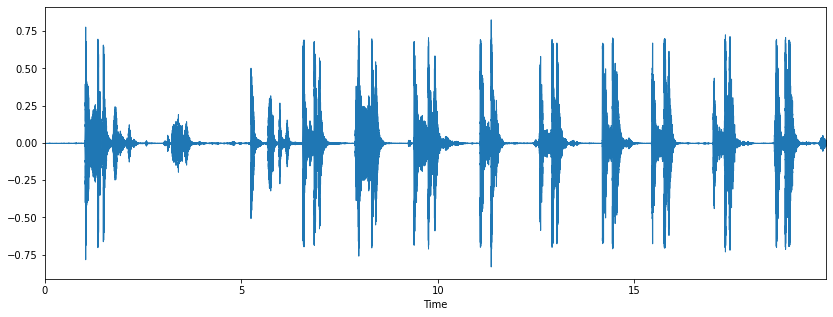

In [6]:
filename_neg="clinical\\original\\neg\\neg-0421-088-cough-f-66.mp3"
plt.figure(figsize=(14,5))
data_neg,sample_rate_neg=librosa.load(filename_neg)
librosa.display.waveplot(data_neg,sr=sample_rate_neg)
ipd.Audio(filename_neg)

#### Normalized Sample Rate

In [7]:
sample_rate_neg

22050

#### Audio data converted to array

In [8]:
data_neg

array([0.       , 0.       , 0.       , ..., 0.0018331, 0.0038525,
       0.       ], dtype=float32)

## Mel spectogram of COVID positive cough audio

In [9]:
y, sr = librosa.load(filename_pos)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 765)

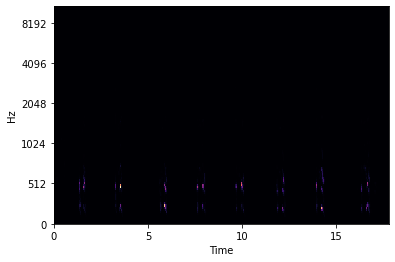

In [10]:
librosa.display.specshow(ps,y_axis='mel',x_axis='time')

## Mel spectogram of COVID Negative cough audio

In [11]:
y, sr = librosa.load(filename_neg)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 857)

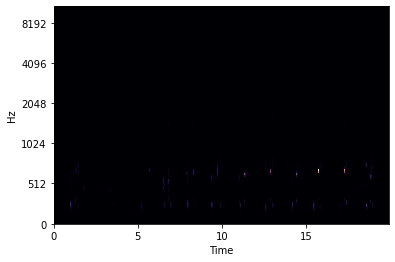

In [12]:
librosa.display.specshow(ps,y_axis='mel',x_axis='time')

## COVID Negative cough audio spectrum

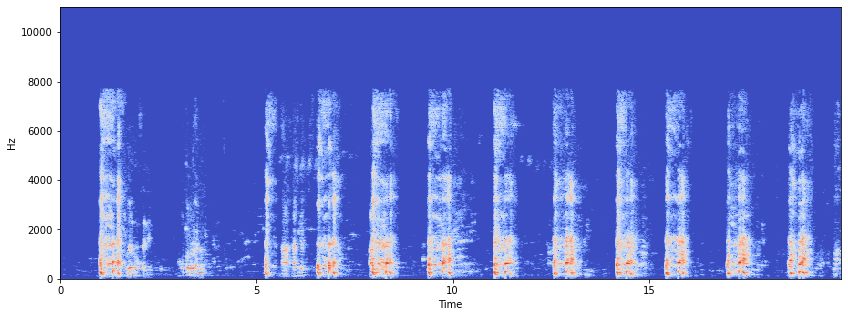

In [13]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')

## COVID Positive cough audio spectrum

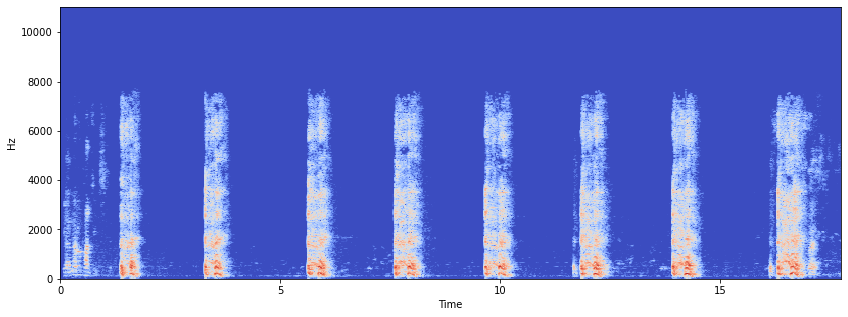

In [14]:
y, sr = librosa.load(filename_pos)
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')

## Feature extraction using MFCC

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

### Extracting features of one file (sample)

In [15]:
filename_pos="clinical\original\pos\\pos-0421-084-cough-m-50.mp3"
data_pos,sample_rate_pos=librosa.load(filename_pos)
mfccs = librosa.feature.mfcc(y=data_pos, sr=sample_rate_pos, n_mfcc=40)
print(mfccs.shape)

(40, 765)


In [16]:
mfccs

array([[-5.5126825e+02, -5.5126825e+02, -5.4601251e+02, ...,
        -5.1879736e+02, -5.1567249e+02, -5.1970978e+02],
       [ 0.0000000e+00,  0.0000000e+00,  6.8114338e+00, ...,
         2.5116859e+01,  2.8397551e+01,  3.0157677e+01],
       [ 0.0000000e+00,  0.0000000e+00,  5.3188505e+00, ...,
         1.8088526e+01,  2.1304604e+01,  1.7772816e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00, -1.2575887e+00, ...,
         4.6400100e-01,  2.9210343e+00,  4.5062594e+00],
       [ 0.0000000e+00,  0.0000000e+00, -2.1845088e+00, ...,
         8.3374043e+00,  8.7302361e+00,  5.9929790e+00],
       [ 0.0000000e+00,  0.0000000e+00, -2.7988749e+00, ...,
        -2.4354794e+00, -2.5820904e+00, -2.5259297e+00]], dtype=float32)

### Extracting features of all audio files

In [17]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [18]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
audio_dataset_path='clinical\\original\\'
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["folder"])+'\\',str(row["cough_filename"]))
    final_class_labels=row["corona_test"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

76it [04:44,  3.74s/it]


In [19]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(20)

,feature,class
0,"[-362.26675, 85.50063, -27.324495, 19.882082, ...",negative
1,"[-419.73032, 59.81665, -6.4413686, 14.772526, ...",positive
2,"[-392.7497, 60.903584, -1.5468708, 12.362222, ...",negative
3,"[-439.70718, 69.86176, -8.996845, 13.870843, -...",positive
4,"[-391.8664, 57.311222, -15.042628, 11.311216, ...",positive
5,"[-373.94162, 80.459946, -9.110424, -1.412021, ...",negative
6,"[-440.20844, 50.426956, -6.9619546, 14.114877,...",negative
7,"[-401.80597, 89.8483, -21.094421, 9.897527, -2...",negative
8,"[-440.315, 70.1227, 4.528007, 6.696279, -5.389...",negative
9,"[-367.23538, 77.67865, -11.57527, 9.818058, -2...",positive


In [20]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [21]:
X.shape

(76, 40)

In [22]:
y

array(['negative', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negati

### Label Encoding

In [23]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [24]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### Train - Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train

array([[-5.2402637e+02,  5.6987354e+01, -4.2589512e+00, ...,
         2.0481355e-01,  3.9402132e+00,  2.0798962e+00],
       [-4.9306253e+02,  1.4614683e+01, -2.3427277e+00, ...,
         1.0731262e+00, -7.8298211e-02,  8.9549601e-01],
       [-3.6803516e+02,  5.0508846e+01,  9.3852711e+00, ...,
        -1.3530470e+00, -1.5751493e+00,  2.4827635e+00],
       ...,
       [-3.9524927e+02,  5.0770729e+01,  2.2054594e+01, ...,
        -3.2736582e-01, -1.2837274e+00,  2.1400090e-02],
       [-4.0264984e+02,  5.8334717e+01,  5.9546204e+00, ...,
         1.3401449e-01, -1.5818532e-01,  2.1612546e-01],
       [-4.6127905e+02,  2.1776873e+01, -9.7883072e+00, ...,
         2.0757443e-01, -1.5606796e-02,  3.0636638e-01]], dtype=float32)

In [27]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [28]:
X_train.shape

(60, 40)

In [29]:
X_test.shape

(16, 40)

In [30]:
y_train.shape

(60, 2)

In [31]:
y_test.shape

(16, 2)

## Model Creation

In [32]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [34]:
### No of classes
num_labels=y.shape[1]

In [72]:
model=Sequential()

###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [74]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

### Training model 

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7737 - accuracy: 0.7500
Epoch 00001: val_loss improved from inf to 0.53922, saving model to saved_models\audio_classification.hdf5
2/2 [==============================] - 0s 45ms/step - loss: 0.7098 - accuracy: 0.6500 - val_loss: 0.5392 - val_accuracy: 0.8125
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5062 - accuracy: 0.7812
Epoch 00002: val_loss did not improve from 0.53922
2/2 [==============================] - 0s 17ms/step - loss: 0.6141 - accuracy: 0.6833 - val_loss: 0.5396 - val_accuracy: 0.8125
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.6844 - accuracy: 0.6875
Epoch 00003: val_loss did not improve from 0.53922
2/2 [==============================] - 0s 18ms/step - loss: 0.8231 - accuracy: 0.7167 - val_loss: 0.5451 - val_accuracy: 0.8125
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.5406 - accuracy: 0.7500
Epoch 00004: val_loss did not impro

### Model accuracy

In [88]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.875


### Testing

In [82]:
X_train[1]

array([-4.9306253e+02,  1.4614683e+01, -2.3427277e+00,  4.7251754e+00,
       -4.9997411e+00, -5.0991964e+00, -9.8744669e+00, -6.1525531e+00,
       -4.7394080e+00, -8.1517023e-01, -3.9094977e+00, -3.0535016e+00,
       -1.5697505e+00,  1.9981915e+00,  9.9561042e-01,  1.5086237e+00,
        1.0312737e-03,  1.2510941e+00,  6.2790591e-01,  1.3772461e+00,
        4.6870390e-01,  1.7234601e+00, -8.3529478e-01,  1.4567796e+00,
        4.4083104e-01,  5.9845048e-01,  7.2546071e-01,  3.8946551e-01,
        1.9497243e-01,  6.3206190e-01, -4.1609910e-01,  8.3015215e-01,
        1.1107289e-01,  8.3418852e-01,  6.1854815e-01,  1.0216424e+00,
        7.0161372e-01,  1.0731262e+00, -7.8298211e-02,  8.9549601e-01],
      dtype=float32)

In [89]:
np.argmax(model.predict(X_train), axis=-1)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Testing with Some audio recordings of me coughing

In [90]:
filename="clinical\\shivam_cough.mp3"
audio, sample_rate = librosa.load(filename, res_type='kaiser_best') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-3.5887982e+02  6.8352638e+01  8.9355345e+00  2.0273819e+01
 -8.8841134e-01  3.2996807e+00 -2.0065159e+01 -5.9433098e+00
 -7.9503412e+00  1.8832532e-01 -1.0156484e+01 -1.2615176e+01
 -1.5022754e+01 -5.7426333e+00 -5.3318629e+00 -6.2207584e+00
 -1.3299288e+01 -3.2086434e+00 -9.2501783e+00 -7.0228310e+00
 -6.7276292e+00 -5.7607746e+00 -4.7696905e+00 -2.0750031e+00
 -5.4737725e+00 -8.8357725e+00 -8.0440655e+00 -1.9138778e+00
 -6.2845798e+00 -1.3863666e-01 -3.5454631e+00 -9.6129239e-01
 -1.4628593e+00 -1.6901464e+00 -1.4948844e+00 -1.6255490e+00
 -6.5643656e-01  4.0409231e-01  4.7367591e-01  1.5002840e+00]
[[-3.5887982e+02  6.8352638e+01  8.9355345e+00  2.0273819e+01
  -8.8841134e-01  3.2996807e+00 -2.0065159e+01 -5.9433098e+00
  -7.9503412e+00  1.8832532e-01 -1.0156484e+01 -1.2615176e+01
  -1.5022754e+01 -5.7426333e+00 -5.3318629e+00 -6.2207584e+00
  -1.3299288e+01 -3.2086434e+00 -9.2501783e+00 -7.0228310e+00
  -6.7276292e+00 -5.7607746e+00 -4.7696905e+00 -2.0750031e+00
  -5.4737725e+00 

array(['negative'], dtype='<U8')